## Model: Dense Neural Network

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import pickle
import time
from sklearn.metrics import mean_squared_error
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow import math

pd.set_option('display.max_columns', None)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 1500_sentiment_api.csv to 1500_sentiment_api.csv


In [3]:

import io
df = pd.read_csv(io.BytesIO(uploaded['1500_sentiment_api.csv']))
# Dataset is now stored in a Pandas Dataframe

In [4]:
df.head()

,id,latitude,longitude,price,shared_status,accommodates,accomodation_group,bathrooms,bedrooms,beds_adjusted,neighborhood,city,has_neighborhood_overview,has_reviews,host_in_CO,host_lives_in_neighborhood,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,has_host_about,years_hosting,years_of_reviews,license_listed,response_time,host_lives_in_neighborhood.1,name,host_about,description,neighborhood_overview,amenities,minimum_nights,maximum_nights,min_stay_group,max_stay_group,has_availability,availability_30,availability_60,availability_90,availability_365,instant_bookable,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,bike_scores,walk_scores,transit_scores,property_page_links,name_sent_compound,name_sent_pos,name_sent_neg,name_sent_neu,host_sent_compound,host_sent_pos,host_sent_neg,host_sent_neu,description_sent_compound,description_sent_pos,description_sent_neg,description_sent_neu,neighborhood_sent_compound,neighborhood_sent_pos,neighborhood_sent_neg,neighborhood_sent_neu,25*k
0,177,39.69551,-104.92489,79.0,entire home,2,0-2,1.0,1.0,1.0,Virginia Village,Denver,1,1,1,1,615,Joe,within an hour,1.0,1.00,1.0,Virginia Village,2.0,2.0,1.0,0.0,1,15.0,6.0,1,0.0,1,Tiny Home in the Heart of the City- ECO FRIENDLY,"I'm originally from Oklahoma, but have lived i...","160 sq ft + 80 sq ft loft for sleeping, Sleeps...","Quiet neighborhood next to park, creeks and bi...","[""Hot water"", ""Long term stays allowed"", ""Coff...",29,400,month,long_term,1,29,59,89,364,0,120,24,0,4.85,4.96,4.89,4.97,4.94,4.85,4.78,1.56,84.0,51.0,37.0,https://www.walkscore.com/score/loc/lat=39.695...,0.6037,0.304,0.0,0.696,0.6948,0.192,0.000,0.808,0.9476,0.153,0.069,0.778,0.0000,0.000,0.000,1.000,4.0
1,360,39.76758,-105.00316,133.0,entire home,3,3-4,1.0,2.0,2.0,Highland,Denver,1,1,1,1,666,Jennifer & Giovanni,within an hour,1.0,0.87,1.0,Highland,4.0,4.0,1.0,1.0,1,15.0,4.0,1,0.0,1,Sit in the Peaceful Garden of the Chickadee Co...,We are artists and tinkerers.\r\n \r\nWe enjoy...,Enjoy the famous Colorado weather and unplug i...,The cottage is located in the center of Lower ...,"[""Coffee maker"", ""Washer"", ""Bedroom comforts"",...",29,35,month,2_months,1,0,0,30,30,0,174,7,1,4.99,4.99,4.96,5.00,5.00,5.00,4.91,3.26,93.0,90.0,49.0,https://www.walkscore.com/score/loc/lat=39.767...,0.4939,0.242,0.0,0.758,0.9694,0.141,0.023,0.835,0.9814,0.271,0.019,0.709,0.1531,0.025,0.018,0.956,6.0
2,2361919,39.77960,-105.03859,76.0,entire home,2,0-2,1.0,1.0,1.0,Berkeley,Denver,1,1,1,1,5811115,Annette,within a few hours,1.0,0.81,1.0,Berkeley,5.0,6.0,1.0,0.0,1,10.0,8.0,0,1.0,1,The Cloisters at Berkeley,"I love people of all ages and types, dogs, lon...",A private studio apartment in an unbeatable ne...,"Boutiques, bars, restaurants galore! Highlands...","[""Hot water"", ""Long term stays allowed"", ""Coff...",30,1125,month,long_term,1,24,54,84,359,0,43,3,0,4.67,4.74,4.56,4.67,4.60,4.93,4.60,0.40,76.0,81.0,34.0,https://www.walkscore.com/score/loc/lat=39.779...,0.0000,0.000,0.0,1.000,0.9769,0.278,0.000,0.722,0.9269,0.150,0.000,0.850,0.4333,0.067,0.026,0.907,4.0
3,2386289,39.76777,-105.03529,150.0,entire home,4,3-4,1.0,1.0,1.0,West Highland,Denver,1,1,1,1,184771,Melanie,NaN,NaN,1.00,0.0,West Highland,1.0,2.0,1.0,1.0,1,13.0,8.0,1,4.0,1,Sunny Sky Loft in Highlands,"Things I love: dogs, urban gardening, yoga, ho...",Why stay in a stuffy old hotel room when you c...,The neighborhood where the house is located is...,"[""Hot water"", ""Long term stays allowed"", ""Coff...",7,30,week,month,1,0,0,0,0,0,95,1,0,4.91,4.87,4.89,4.96,4.97,4.93,4.83,0.94,75.0,86.0,39.0,https://www.walkscore.com/score/loc/lat=39.767...,0.4215,0.412,0.0,0.588,0.9716,0.247,0.000,0.

In [5]:
df.isna().sum()

id                            0
latitude                      0
longitude                     0
price                         0
shared_status                 0
                             ..
neighborhood_sent_compound    0
neighborhood_sent_pos         0
neighborhood_sent_neg         0
neighborhood_sent_neu         0
25*k                          0
Length: 80, dtype: int64

#### Defining X and y

In [6]:
X = df[[
    'shared_status', 
    'accommodates',
    'bathrooms', 
    'bedrooms',
    'beds_adjusted',
    'neighborhood', 
    'has_neighborhood_overview', 
    'has_reviews',
    'instant_bookable',
    'host_lives_in_neighborhood',
     'host_is_superhost', 
    'host_has_profile_pic',
    'host_identity_verified', 
    'has_host_about', 
    'years_hosting',
    'license_listed', 
    'minimum_nights',
    'maximum_nights',
     'number_of_reviews',
     'bike_scores',
    'walk_scores',
    'host_sent_compound', 
    'description_sent_compound', 
    'neighborhood_sent_compound']]


X = pd.get_dummies(columns=[ 
                            
                            'shared_status',
                            'neighborhood'
                           ], 
                   drop_first=True, data=X)

y = df['price']

#### Train/Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=2023)

#### Standard Scaling

In [8]:
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

### Basic Model

In [9]:
n_input = Z_train.shape[1]

model = Sequential()
model.add(Dense(64, input_shape=(n_input,), activation='relu'))
model.add(Dense(1, activation='linear'))


model.compile(
    loss='mse',
    optimizer='adam',
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)
# model.summary()


In [10]:
history = model.fit(
    Z_train,
    y_train,
    validation_data=(Z_test, y_test),
    epochs=70,
    batch_size=64)

Epoch 1/70
66/66 [==============================] - 5s 6ms/step - loss: 42385.0508 - root_mean_squared_error: 205.8763 - val_loss: 41972.5586 - val_root_mean_squared_error: 204.8721
Epoch 2/70
66/66 [==============================] - 0s 4ms/step - loss: 40567.2656 - root_mean_squared_error: 201.4132 - val_loss: 39833.2539 - val_root_mean_squared_error: 199.5827
Epoch 3/70
66/66 [==============================] - 0s 4ms/step - loss: 37918.3477 - root_mean_squared_error: 194.7263 - val_loss: 36713.0742 - val_root_mean_squared_error: 191.6066
Epoch 4/70
66/66 [==============================] - 0s 4ms/step - loss: 34277.0586 - root_mean_squared_error: 185.1406 - val_loss: 32740.5059 - val_root_mean_squared_error: 180.9434
Epoch 5/70
66/66 [==============================] - 0s 6ms/step - loss: 29875.0039 - root_mean_squared_error: 172.8439 - val_loss: 28128.2402 - val_root_mean_squared_error: 167.7148
Epoch 6/70
66/66 [==============================] - 0s 5ms/step - loss: 25083.9355 - root_

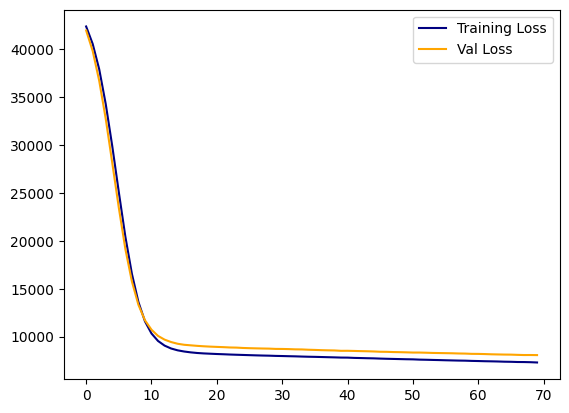

In [11]:
plt.plot(history.history['loss'], c='navy', label='Training Loss')
plt.plot(history.history['val_loss'], c='orange', label='Val Loss')
plt.legend();

In [12]:
y_pred = model.predict(Z_test)
rmse = (mean_squared_error(y_test, y_pred))**0.5
print("RMSE:", rmse)

33/33 [==============================] - 0s 1ms/step
RMSE: 89.82955053742045


# Building a more involve model
89 isn't too far off how my other models are performing. 
Maybe adding more layers will help

In [13]:
es = EarlyStopping(monitor='val_loss', patience=7, verbose=1)


In [14]:
n_input = Z_train.shape[1]

model = Sequential()
model.add(Dense(32, input_shape=(n_input,), activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

model.compile(
    loss='mse',
    optimizer='adam',
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

history = model.fit(
    Z_train,
    y_train,
    validation_data=(Z_test, y_test),
    epochs=70,
    batch_size=128,
    callbacks=[es]
)

Epoch 1/70
33/33 [==============================] - 4s 12ms/step - loss: 42463.0664 - root_mean_squared_error: 206.0657 - val_loss: 43984.3320 - val_root_mean_squared_error: 209.7244
Epoch 2/70
33/33 [==============================] - 0s 7ms/step - loss: 39762.1250 - root_mean_squared_error: 199.4044 - val_loss: 43558.7891 - val_root_mean_squared_error: 208.7074
Epoch 3/70
33/33 [==============================] - 0s 7ms/step - loss: 36688.1172 - root_mean_squared_error: 191.5414 - val_loss: 43365.5195 - val_root_mean_squared_error: 208.2439
Epoch 4/70
33/33 [==============================] - 0s 8ms/step - loss: 33606.9336 - root_mean_squared_error: 183.3219 - val_loss: 42172.3320 - val_root_mean_squared_error: 205.3590
Epoch 5/70
33/33 [==============================] - 0s 7ms/step - loss: 30536.4141 - root_mean_squared_error: 174.7467 - val_loss: 39245.8594 - val_root_mean_squared_error: 198.1057
Epoch 6/70
33/33 [==============================] - 0s 11ms/step - loss: 26936.3691 - roo

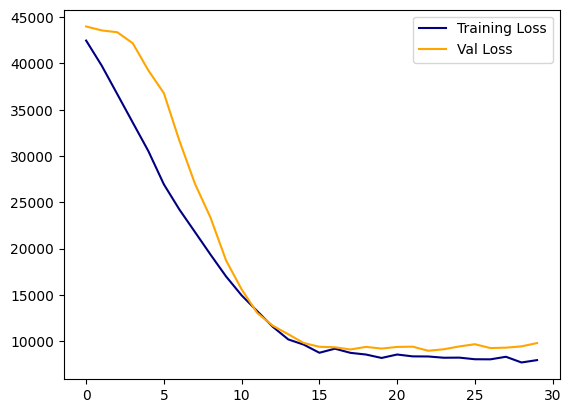

In [15]:
plt.plot(history.history['loss'], c='navy', label='Training Loss')
plt.plot(history.history['val_loss'], c='orange', label='Val Loss')
plt.legend();

In [16]:
y_pred = model.predict(Z_test)
rmse = (mean_squared_error(y_test, y_pred))**0.5
print("RMSE:", rmse)

33/33 [==============================] - 0s 2ms/step
RMSE: 99.00632490492278


#### With a log transformation of y?
Heading in the wrong direction, overfitting. 

In [17]:
X = df[[
    'shared_status', 
    'accommodates', 
    'bathrooms', 
    'bedrooms', 
    'beds_adjusted', 
    'neighborhood', 
    'city',
    'has_neighborhood_overview',
    'has_reviews',
    'host_listings_count',
    'host_is_superhost' , 
    'host_identity_verified',
    'has_host_about',
    'host_lives_in_neighborhood', 
    'years_hosting' , 
    'years_of_reviews', 
    'license_listed',
    'bike_scores', 
    'walk_scores',
    'minimum_nights',
    'maximum_nights',
    'instant_bookable',
    'number_of_reviews',
    'name_sent_pos',
    'host_sent_pos',
    'description_sent_pos',
    'neighborhood_sent_pos'
    
    
      ]]
X = pd.get_dummies(columns=[ 
                            'city',
                            'shared_status',
                            'neighborhood'
                           ], 
                   drop_first=True, data=X)

y = np.log(df['price'])

#### Train/Test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=2023)

#### Standard Scaling

In [19]:
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

In [20]:
es = EarlyStopping(monitor='val_loss', patience=7, verbose=1)


In [21]:
#adjusting the model, adding/subtracting layers, nodes....
n_input = Z_train.shape[1]

model = Sequential()
model.add(Dense(64, input_shape=(n_input,), activation='leaky_relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.4))
# model.add(BatchNormalization())
model.add(Dense(64, activation='leaky_relu'))
model.add(Dropout(0.4))
# model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

model.compile(
    loss='mse',
    optimizer='rmsprop',
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

history = model.fit(
    Z_train,
    y_train,
    validation_data=(Z_test, y_test),
    epochs=70,
    batch_size=128,
    callbacks=[es]
)

Epoch 1/70
33/33 [==============================] - 2s 9ms/step - loss: 19.5868 - root_mean_squared_error: 4.4257 - val_loss: 14.4790 - val_root_mean_squared_error: 3.8051
Epoch 2/70
33/33 [==============================] - 0s 7ms/step - loss: 9.5552 - root_mean_squared_error: 3.0911 - val_loss: 7.5711 - val_root_mean_squared_error: 2.7516
Epoch 3/70
33/33 [==============================] - 0s 6ms/step - loss: 4.5835 - root_mean_squared_error: 2.1409 - val_loss: 3.6828 - val_root_mean_squared_error: 1.9191
Epoch 4/70
33/33 [==============================] - 0s 5ms/step - loss: 3.0957 - root_mean_squared_error: 1.7595 - val_loss: 2.4192 - val_root_mean_squared_error: 1.5554
Epoch 5/70
33/33 [==============================] - 0s 5ms/step - loss: 2.5300 - root_mean_squared_error: 1.5906 - val_loss: 1.9891 - val_root_mean_squared_error: 1.4104
Epoch 6/70
33/33 [==============================] - 0s 5ms/step - loss: 2.1278 - root_mean_squared_error: 1.4587 - val_loss: 1.5047 - val_root_mean_

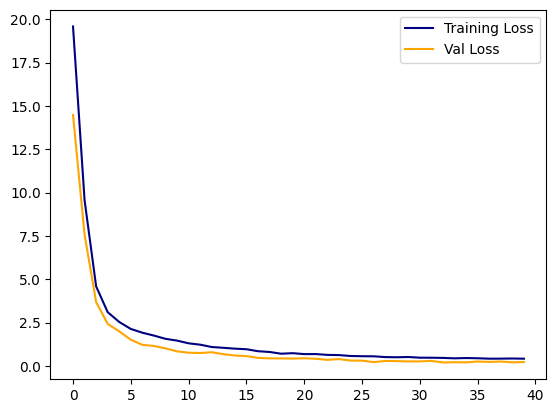

In [22]:
plt.plot(history.history['loss'], c='navy', label='Training Loss')
plt.plot(history.history['val_loss'], c='orange', label='Val Loss')
plt.legend();

In [23]:
y_pred_power = model.predict(Z_test)
y_preds = [math.exp(y_pred_i) for y_pred_i in y_pred_power]
y_test_regular = [math.exp(y_test_i) for y_test_i in y_test]
rmse = (mean_squared_error(y_test_regular, y_preds))**0.5
print("RMSE:", rmse)

33/33 [==============================] - 0s 1ms/step
RMSE: 109.0404929444218


# Back to simpler models
Was going in the wrong direction.  Going back to the first model, just adding in some drop/normalization

In [24]:
#Best so far

n_input = Z_train.shape[1]

model = Sequential()
model.add(Dense(64, input_shape=(n_input,), activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))


model.compile(
    loss='mse',
    optimizer='adam',
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)
# model.summary()

history = model.fit(
    Z_train,
    y_train,
    validation_data=(Z_test, y_test),
    epochs=70,
    batch_size=64)


Epoch 1/70
66/66 [==============================] - 2s 7ms/step - loss: 22.1347 - root_mean_squared_error: 4.7048 - val_loss: 21.1877 - val_root_mean_squared_error: 4.6030
Epoch 2/70
66/66 [==============================] - 0s 5ms/step - loss: 15.0062 - root_mean_squared_error: 3.8738 - val_loss: 11.4102 - val_root_mean_squared_error: 3.3779
Epoch 3/70
66/66 [==============================] - 0s 5ms/step - loss: 7.3860 - root_mean_squared_error: 2.7177 - val_loss: 3.4749 - val_root_mean_squared_error: 1.8641
Epoch 4/70
66/66 [==============================] - 0s 4ms/step - loss: 3.5072 - root_mean_squared_error: 1.8728 - val_loss: 1.2723 - val_root_mean_squared_error: 1.1280
Epoch 5/70
66/66 [==============================] - 0s 5ms/step - loss: 2.6136 - root_mean_squared_error: 1.6167 - val_loss: 0.8590 - val_root_mean_squared_error: 0.9268
Epoch 6/70
66/66 [==============================] - 0s 5ms/step - loss: 2.1399 - root_mean_squared_error: 1.4629 - val_loss: 0.6593 - val_root_mea

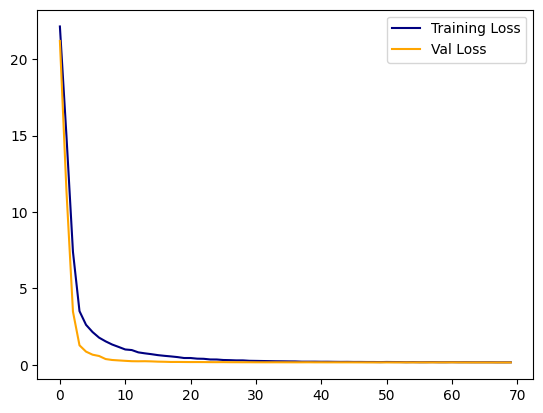

In [25]:
plt.plot(history.history['loss'], c='navy', label='Training Loss')
plt.plot(history.history['val_loss'], c='orange', label='Val Loss')
plt.legend();

In [27]:
y_pred_power = model.predict(Z_test)
y_preds = [math.exp(y_pred_i) for y_pred_i in y_pred_power]
y_test_regular = [math.exp(y_test_i) for y_test_i in y_test]
rmse = (mean_squared_error(y_test_regular, y_preds))**0.5
print("RMSE:", rmse)


33/33 [==============================] - 0s 4ms/step
RMSE: 102.02783302088456
